In [1]:
from dash.dependencies import Input, Output, State
import dash_bootstrap_components as dbc
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash,dcc,html
import jupyter_dash
import plotly.express as px
import dash
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Read dataset

In [2]:
Kaggle_DATASET = 'assets/coffee_coding_kaggle.csv'
Survey_DATASET = 'assets/coffee_coding.csv'

In [3]:
coffee_coding = pd.read_csv(Survey_DATASET)
coffee_coding = coffee_coding.iloc[:85,:9]
coffee_coding

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,3,3.0,Before coding,Yes,Cappuccino,Yes,Female,Egypt,18 to 29
1,3,3.0,While coding,Yes,Cappuccino,Yes,Female,Egypt,18 to 29
2,8,8.0,Before coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
3,8,8.0,While coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
4,3,3.0,While coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
...,...,...,...,...,...,...,...,...,...
80,3,3.0,While coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
81,3,3.0,All the time,No,Nescafe,No,Male,Egypt,18 to 29
82,2,2.0,Before coding,No,Nescafe,Sometimes,Female,Egypt,18 to 29
83,10,10.0,Before coding,Yes,Turkish,Sometimes,Male,Egypt,18 to 29


In [4]:
coffee_coding_kaggle = pd.read_csv(Kaggle_DATASET)
coffee_coding_kaggle


,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,No,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,No,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,Yes,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
99,6,2,Before coding,No,Nescafe,Yes,Male,Lebanon,18 to 29
100,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
101,10,3,Before coding,No,Cappuccino,Yes,Male,Lebanon,Under 18
102,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


In [5]:
coffee_df = pd.concat([coffee_coding_kaggle, coffee_coding],axis=0,ignore_index=True)
coffee_df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2.0,Before coding,No,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2.0,Before coding,No,Americano,Yes,Female,Lebanon,30 to 39
2,5,3.0,While coding,Yes,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2.0,Before coding,Yes,Nescafe,Yes,Male,Lebanon,NaN
4,10,3.0,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
184,3,3.0,While coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
185,3,3.0,All the time,No,Nescafe,No,Male,Egypt,18 to 29
186,2,2.0,Before coding,No,Nescafe,Sometimes,Female,Egypt,18 to 29
187,10,10.0,Before coding,Yes,Turkish,Sometimes,Male,Egypt,18 to 29


## Data exploration

In [6]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodingHours       189 non-null    int64  
 1   CoffeeCupsPerDay  189 non-null    float64
 2   CoffeeTime        189 non-null    object 
 3   CodingWithCoffee  189 non-null    object 
 4   CoffeeType        188 non-null    object 
 5   CoffeeSolveBugs   189 non-null    object 
 6   Gender            189 non-null    object 
 7   Country           189 non-null    object 
 8   AgeRange          187 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 13.4+ KB


In [7]:
coffee_df.isnull().sum()

CodingHours         0
CoffeeCupsPerDay    0
CoffeeTime          0
CodingWithCoffee    0
CoffeeType          1
CoffeeSolveBugs     0
Gender              0
Country             0
AgeRange            2
dtype: int64

In [8]:
coffee_df.describe()

,CodingHours,CoffeeCupsPerDay
count,189.00000,189.000000
mean,5.94709,4.026455
std,2.74973,2.537870
min,0.00000,0.000000
25%,4.00000,2.000000
50%,6.00000,4.000000
75%,8.00000,5.000000
max,15.00000,15.000000


## Clean Data
- fill Nan

In [9]:
most_frequent_coffee_type = coffee_df["CoffeeType"].mode()[0]
most_frequent_coffee_type

'Nescafe'

In [10]:
most_frequent_age = coffee_df["AgeRange"].mode()[0]
most_frequent_age

'18 to 29'

In [11]:
coffee_df["CoffeeType"].fillna(most_frequent_coffee_type,inplace=True)
coffee_df["AgeRange"].fillna(most_frequent_age,inplace=True)


In [12]:
mean_coffee_cups = int(coffee_df["CoffeeCupsPerDay"].mean())
coffee_df["CoffeeCupsPerDay"] = coffee_df["CoffeeCupsPerDay"].fillna(mean_coffee_cups)
coffee_df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2.0,Before coding,No,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2.0,Before coding,No,Americano,Yes,Female,Lebanon,30 to 39
2,5,3.0,While coding,Yes,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2.0,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
4,10,3.0,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
184,3,3.0,While coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
185,3,3.0,All the time,No,Nescafe,No,Male,Egypt,18 to 29
186,2,2.0,Before coding,No,Nescafe,Sometimes,Female,Egypt,18 to 29
187,10,10.0,Before coding,Yes,Turkish,Sometimes,Male,Egypt,18 to 29


- Double check

In [13]:
coffee_df.isnull().sum()

CodingHours         0
CoffeeCupsPerDay    0
CoffeeTime          0
CodingWithCoffee    0
CoffeeType          0
CoffeeSolveBugs     0
Gender              0
Country             0
AgeRange            0
dtype: int64

- Find correlation

In [14]:
coffee_vs_coding = pd.DataFrame.copy(coffee_df)
coffee_vs_coding

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2.0,Before coding,No,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2.0,Before coding,No,Americano,Yes,Female,Lebanon,30 to 39
2,5,3.0,While coding,Yes,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2.0,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
4,10,3.0,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
184,3,3.0,While coding,Sometimes,Nescafe,Sometimes,Female,Egypt,18 to 29
185,3,3.0,All the time,No,Nescafe,No,Male,Egypt,18 to 29
186,2,2.0,Before coding,No,Nescafe,Sometimes,Female,Egypt,18 to 29
187,10,10.0,Before coding,Yes,Turkish,Sometimes,Male,Egypt,18 to 29


In [15]:
encoder = LabelEncoder().fit(["CoffeeTime","CodingWithCoffee","CoffeeType","CoffeeSolveBugs","Gender","Country","AgeRange"])
coffee_vs_coding['AgeRange_transform'] = encoder.fit_transform(coffee_vs_coding['AgeRange'])
coffee_vs_coding['Country_transform'] = encoder.fit_transform(coffee_vs_coding['Country'])
coffee_vs_coding['Gender_transform'] = encoder.fit_transform(coffee_vs_coding['Gender'])
coffee_vs_coding['CoffeeSolveBugs_transform'] = encoder.fit_transform(coffee_vs_coding['CoffeeSolveBugs'])
coffee_vs_coding['CoffeeType_transform'] = encoder.fit_transform(coffee_vs_coding['CoffeeType'])
coffee_vs_coding['CodingWithoutCoffee_transform'] = encoder.fit_transform(coffee_vs_coding['CodingWithCoffee'])
coffee_vs_coding['CoffeeTime_transform'] = encoder.fit_transform(coffee_vs_coding['CoffeeTime'])

In [16]:
coffee_vs_coding.corr()

,CodingHours,CoffeeCupsPerDay,AgeRange_transform,Country_transform,Gender_transform,CoffeeSolveBugs_transform,CoffeeType_transform,CodingWithoutCoffee_transform,CoffeeTime_transform
CodingHours,1.000000,0.506318,0.020262,0.195862,0.201762,0.084255,-0.049316,0.121078,0.101285
CoffeeCupsPerDay,0.506318,1.000000,-0.212675,-0.473781,-0.005100,0.119328,0.086570,0.226533,-0.133028
AgeRange_transform,0.020262,-0.212675,1.000000,0.395608,0.197170,0.029107,-0.035550,-0.196740,0.113908
Country_transform,0.195862,-0.473781,0.395608,1.000000,0.264394,0.033407,-0.187941,-0.070186,0.371652
Gender_transform,0.201762,-0.005100,0.197170,0.264394,1.000000,0.012670,0.023598,-0.064681,0.127013
CoffeeSolveBugs_transform,0.084255,0.119328,0.029107,0.033407,0.012670,1.000000,-0.006750,0.271533,0.053251
CoffeeType_transform,-0.049316,0.086570,-0.035550,-0.187941,0.023598,-0.006750,1.000000,0.092025,-0.053267
CodingWithoutCoffee_transform,0.121078,0.226533,-0.196740,-0.070186,-0.064681,0.271533,0.092025,1.000000,0.037140
CoffeeTime_transform,0.101285,-0.133028,0.113908,0.371652,0.127013,0.053251,-0.053267,0.037140,1.000000


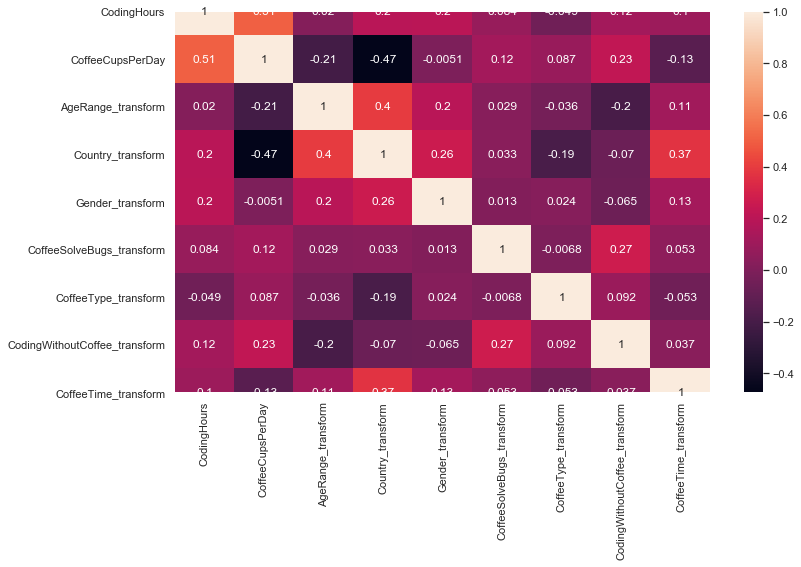

In [17]:
sns.set(rc = {'figure.figsize':(12,7)})
sns.heatmap(coffee_vs_coding.corr(),annot=True)

In [18]:
cols = ['No', 'Yes']
coffee_solve_bugs = coffee_df.loc[coffee_df['CoffeeSolveBugs'].isin(cols)]
coffee_solve_bugs

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
1,3,2.0,Before coding,No,Americano,Yes,Female,Lebanon,30 to 39
2,5,3.0,While coding,Yes,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2.0,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
4,10,3.0,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
5,8,2.0,While coding,Sometimes,Nescafe,Yes,Male,Lebanon,30 to 39
...,...,...,...,...,...,...,...,...,...
178,8,8.0,While coding,Sometimes,Turkish,Yes,Male,Egypt,18 to 29
179,15,15.0,Before coding,Yes,Turkish,Yes,Male,Egypt,18 to 29
182,4,4.0,All the time,Yes,Nescafe,No,Male,Egypt,18 to 29
185,3,3.0,All the time,No,Nescafe,No,Male,Egypt,18 to 29


_________________________________________

## Clustering

In [19]:
coffee_df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2.0,Before coding,No,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2.0,Before coding,No,Americano,Yes,Female,Lebanon,30 to 39
2,5,3.0,While coding,Yes,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2.0,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
4,10,3.0,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


### One hot encoding Categorical data

In [20]:
cols = ['AgeRange', 'Country', 'Gender', 'CoffeeSolveBugs', 'CoffeeType', 'CodingWithCoffee', 'CoffeeTime']
df_copy = coffee_df.copy()
for i in cols:
    dummy_col = pd.get_dummies(coffee_df[i], prefix=i)
    df_copy = pd.concat([df_copy, dummy_col], axis=1)
    df_copy.drop([i], axis=1, inplace=True)  

In [21]:
df_copy

,CodingHours,CoffeeCupsPerDay,AgeRange_18 to 29,AgeRange_30 to 39,AgeRange_40 to 49,AgeRange_50 to 59,AgeRange_Under 18,Country_Egypt,Country_Lebanon,Gender_Female,...,CoffeeType_Double Espresso (Doppio),CoffeeType_Espresso (Short Black),CoffeeType_Nescafe,CoffeeType_Turkish,CodingWithCoffee_No,CodingWithCoffee_Sometimes,CodingWithCoffee_Yes,CoffeeTime_All the time,CoffeeTime_Before coding,CoffeeTime_While coding
0,8,2.0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,3,2.0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,5,3.0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,1
3,8,2.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,10,3.0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,3,3.0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
185,3,3.0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
186,2,2.0,1,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
187,10,10.0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


### Normalize dataset Using robust Scaler

### Clustering

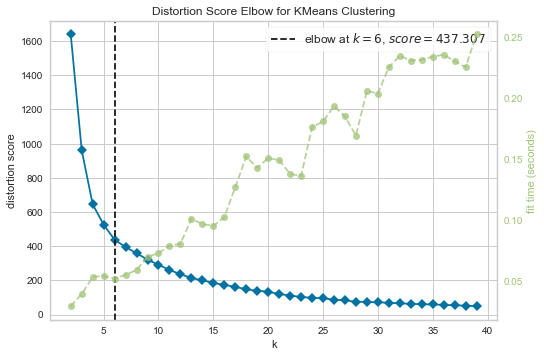

Silhouette Score : 0.28133219926680064
Silhouette Score : -0.004568572251125291


In [22]:
### One hot encoding Categorical data
### PCA

def apply_pca(n_components, data):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components, columns =[f'p_c{i}' for i in range(n_components)])
    return principal_df

principal_df = apply_pca(3, df_copy)
### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# we ask for 4 nearest, because the data point it self (distance = 0) is included
vis = KElbowVisualizer(KMeans(), k=(2,40)).fit(principal_df)
vis.show()
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters).fit(df_copy)
print(f'Silhouette Score : {silhouette_score(df_copy, labels = kmeans.labels_)}')

dbscan_model = DBSCAN(eps=1.2, min_samples=3).fit(principal_df)
print(f'Silhouette Score : {silhouette_score(df_copy, labels = dbscan_model.labels_)}')

dbscan_model.labels_
### Clustering visualization
# model = PCA()
# pca_df = model.fit(df_copy)
# features = range(pca_df.n_components_)
# plt.bar(features, model.explained_variance_ )
# plt.xlabel('PCA feature')
# plt.ylabel('variance')
# plt.xticks(features)
# plt.show()


import plotly.io as pio
pio.renderers.default = "notebook"

import plotly.express as px

clustering_fig = px.scatter_3d(principal_df, x='p_c0', y='p_c1', z='p_c2',
                color=kmeans.labels_)


_________________________________________

### Dash App

In [23]:
app = Dash(__name__, external_stylesheets=[dbc.themes.DARKLY],
           meta_tags=[{'name': 'viewport',
                            'content': 'width=device-width, initial-scale=1.0'}]
)

### Graphs

In [24]:
#### Main graphs ####
code_with_coffee_solve_bugs_gph = px.bar(coffee_df, x="CodingWithCoffee", color="CoffeeSolveBugs",barmode="group", color_discrete_sequence=px.colors.qualitative.Antique)

coffee_time_solve_bugs_gph = px.histogram(coffee_df, x = 'CoffeeTime', color='CoffeeSolveBugs', barmode='group', color_discrete_sequence=px.colors.qualitative.Antique)

coffee_type_solve_bugs_gph = px.bar(coffee_df, x='CoffeeType', color='CoffeeSolveBugs', color_discrete_sequence=px.colors.qualitative.Antique)


coffee_cups_solve_bug_gph = px.scatter(coffee_df, y="CoffeeCupsPerDay", x='CoffeeSolveBugs' , color='CoffeeSolveBugs' ,color_discrete_sequence=px.colors.qualitative.Antique)

code_with_coffee_coding_hours_gph = px.scatter(coffee_df, x="CodingWithCoffee", y='CodingHours', color='CoffeeSolveBugs' ,color_discrete_sequence=px.colors.qualitative.Antique)

coffee_cups_coding_hours_gph = px.scatter(coffee_df, y="CoffeeCupsPerDay", x='CodingHours', color='CoffeeSolveBugs',  color_discrete_sequence=px.colors.qualitative.Antique)

df_corr_heatmap = px.imshow(coffee_vs_coding.corr().round(2), text_auto=True)



### Cards

In [25]:
gender_list = [{'label': g, 'value': g} for g in coffee_df.Gender.unique()]
gender_list

[{'label': 'Female', 'value': 'Female'}, {'label': 'Male', 'value': 'Male'}]

In [26]:
cols = ['Sometimes', 'Yes']
coffee_yes_solve_yes = coffee_df[(coffee_df['CoffeeSolveBugs']=='Yes') & (np.isin(coffee_df['CodingWithCoffee'],cols))]
coffee_yes_solve_yes

percent_coffee_yes_and_solve_bugs = round(len(coffee_yes_solve_yes)/len(coffee_df),2)
percent_coffee_yes_and_solve_bugs

0.22

In [27]:
coffee_no_solve_yes = coffee_df[(coffee_df['CoffeeSolveBugs']=='Yes') & (coffee_df['CodingWithCoffee']=='No')]
coffee_no_solve_yes

percent_coffee_no_and_solve_bugs = round(len(coffee_no_solve_yes)/len(coffee_df),2)
percent_coffee_no_and_solve_bugs

0.05

In [28]:
coffee_time_before_solve_yes = coffee_df[(coffee_df['CoffeeSolveBugs']=='Yes') & (coffee_df['CoffeeTime']=='Before coding')]
coffee_time_before_solve_yes

percent_coffee_time_before_and_solve_bugs = round(len(coffee_time_before_solve_yes)/len(coffee_df),2)
percent_coffee_time_before_and_solve_bugs

0.1

In [29]:
coffee_time_while_solve_yes = coffee_df[(coffee_df['CoffeeSolveBugs']=='Yes') & (coffee_df['CoffeeTime']=='While coding')]
coffee_time_while_solve_yes

percent_coffee_time_while_and_solve_bugs = round(len(coffee_time_while_solve_yes)/len(coffee_df),2)
percent_coffee_time_while_and_solve_bugs

0.13

In [30]:
drink_coffee_bugs_pan = [
    dbc.CardBody([
        html.H3(f"{percent_coffee_yes_and_solve_bugs*100}%", className='card-title'),
        html.P('DRINK coffee and solve bugs')
    ])
]


no_coffee_bugs_pan = [
    dbc.CardBody([
        html.H3(f"{percent_coffee_no_and_solve_bugs*100}%", className='card-title'),
        html.P("DON'T DRINK coffee and solve bugs")
    ])
]


coffee_before_bugs_pan = [
    dbc.CardBody([
        html.H3(f"{percent_coffee_time_before_and_solve_bugs*100}%", className='card-title'),
        html.P('DRINK coffee BEFORE coding and solve bugs')
    ])
]


coffee_while_bugs_pan = [
    dbc.CardBody([
        html.H3(f"{percent_coffee_time_while_and_solve_bugs*100}%", className='card-title'),
        html.P('DRINK coffee WHILE coding and solve bugs')
    ])
]



In [31]:
# g0_card_content = [
#     dbc.CardBody([
#         dcc.Dropdown(id='gender_drop_box', options=gender_list, value='Male', multi=True, clearable=False)
#     ])
# ]

g1_card_content = [
    dbc.CardBody([
        html.H5('Does coffee solve bugs?', className='card-title'),
        dcc.Graph(id='code_with_coffee_solve_bugs_gph')
    ])
]

g2_card_content = [
    dbc.CardBody([
        html.H5('Best time to drink coffee', className='card-title'),
        dcc.Graph(id='coffee_time_solve_bugs_gph')
    ])
]

g3_card_content = [
    dbc.CardBody([
        html.H5('Most loved coffee types by coders', className='card-title'),
        dcc.Graph(id='coffee_type_solve_bugs_gph')
    ])
]

g4_card_content = [
    dbc.CardBody([
        html.H5('How long you can code with coffee ?', className='card-title'),
        dcc.Graph(figure=code_with_coffee_coding_hours_gph)
    ])
]

g5_card_content = [
    dbc.CardBody([
        html.H5('More cups can make you code longer?', className='card-title'),
        dcc.Graph(figure=coffee_cups_coding_hours_gph)
    ])
]

g6_card_content = [
    dbc.CardBody([
        html.H5('More cups can make you code longer?', className='card-title'),
        dcc.Graph(figure=coffee_cups_solve_bug_gph)
    ])
]

g7_card_content = [
    dbc.CardBody([
        html.H5('Dataset Correlation', className='card-title'),
        dcc.Graph(figure=df_corr_heatmap)
    ])
]

g8_card_content = [
    dbc.CardBody([
        html.H5('Clustering Result', className='card-title'),
        dcc.Graph(figure=clustering_fig)
    ])
]


### Callbacks

In [32]:
@app.callback(
    [
        Output(component_id='code_with_coffee_solve_bugs_gph', component_property='figure'),
        Output(component_id='coffee_type_solve_bugs_gph', component_property='figure'),
        Output(component_id='coffee_time_solve_bugs_gph', component_property='figure')
    ],
    Input('gender_drop_box', 'value')
)
def updateGraphs(value):
    if value is not None:
        if type(value)!=str:
            filtered_df = coffee_df[coffee_df['Gender'].isin(value)]
        else:
            filtered_df = coffee_df[coffee_df['Gender']==value]
        
        code_with_coffee_solve_bugs_gph = px.bar(filtered_df, x="CodingWithCoffee", color="CoffeeSolveBugs",barmode="group", color_discrete_sequence=px.colors.qualitative.Antique)

        coffee_type_solve_bugs_gph = px.bar(filtered_df, x='CoffeeType' , color='CoffeeSolveBugs', color_discrete_sequence=px.colors.qualitative.Antique)
        
        coffee_time_solve_bugs_gph = px.histogram(filtered_df, x = 'CoffeeTime', color='CoffeeSolveBugs', barmode='group', color_discrete_sequence=px.colors.qualitative.Antique)
        
        return code_with_coffee_solve_bugs_gph, coffee_type_solve_bugs_gph, coffee_time_solve_bugs_gph

### Dash layout

### bootsrap layout

In [50]:
app.layout = dbc.Container([
    
    
    # row_1
    dbc.Row([
        dbc.Col(html.H1("Does Coffee Solve Bugs?"), width=12)
        ]),
    

    # row_2
    dbc.Row([
        dbc.Col(dbc.Card(g1_card_content)),
        
        dbc.Col([
                dbc.Row([
                    dbc.Col(dcc.Dropdown(id='gender_drop_box', options=gender_list, value='Male', multi=True, clearable=False)),
                ], className="mb-4"),
                dbc.Row([
                    dbc.Col(dbc.Card(drink_coffee_bugs_pan,style={'text-align':'center','background-color':'#D9B458','padding':'5%'})),
                    #
                    dbc.Col(dbc.Card(no_coffee_bugs_pan,style={'text-align':'center','background-color':'#D9B458 ','padding':'5%'})),
                ],className="mb-4"),
                
                dbc.Row([
                    dbc.Col(dbc.Card(coffee_before_bugs_pan,style={'text-align':'center','background-color':'#D9B458','padding':'5%'})),
                    dbc.Col(dbc.Card(coffee_while_bugs_pan,style={'text-align':'center','background-color':'#D9B458','padding':'5%'})),
                    
                ], className="mb-4"),
                
            ],className="mb-4")
        
    ],className="mb-4"),

    # row_3
    dbc.Row([
        dbc.Col(dbc.Card(g2_card_content)),
        dbc.Col(dbc.Card(g3_card_content))
    ], className="mb-4") ,


    # row_4
    dbc.Row([
        dbc.Col(dbc.Card(g4_card_content)),
        dbc.Col(dbc.Card(g5_card_content)),
        dbc.Col(dbc.Card(g6_card_content))
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dbc.Card(g7_card_content)),
        dbc.Col(dbc.Card(g8_card_content))
    ],className="mb-4")
])

### App server

In [51]:
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/May/2022 23:24:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 23:24:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 23:24:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 23:24:10] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 23:24:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 23:24:10] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 23:24:11] "POST /_dash-update-component HTTP/1.1" 200 -


_______________________________